# Juliaで統計解析
## $x^2$検定
$x^2$検定は、二つの割合の値が同じかどうか判断するための検定  
工業地帯と自然豊かな地方とで、てんとう虫の色を調べたデータを$x^2$検定で解析  
データファイルは`ladybirds_morph_colour.csv`

In [9]:
import Pkg; Pkg.add("CSV"); Pkg.add("Gadfly"); Pkg.add("DataFrames"); Pkg.add("DataFramesMeta"); Pkg.add("Statistics"); Pkg.add("HypothesisTests"); Pkg.add("Cairo");Pkg.add("Fontconfig");

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
  Installed DataFramesMeta ─ v0.6.0
Updating `~/.julia/environments/v1.5/Project.toml`
  [1313f7d8] + DataFramesMeta v0.6.0
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [1313f7d8] + DataFramesMeta v0.6.0
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions..

In [52]:
using CSV, Gadfly, DataFrames, DataFramesMeta, Statistics, HypothesisTests, Cairo, Fontconfig

dat = CSV.read("./datasets/ladybirds_morph_colour.csv", DataFrame)

dat

,Habitat,Site,morph_colour,number
,String,String,String,Int64
1,Rural,R1,black,10
2,Rural,R2,black,3
3,Rural,R3,black,4
4,Rural,R4,black,7
5,Rural,R5,black,6
6,Rural,R1,red,15
7,Rural,R2,red,18
8,Rural,R3,red,9
9,Rural,R4,red,12


In [29]:
# 要約統計量
describe(dat)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Habitat,,Industrial,,Rural,0,String
2,Site,,R1,,U5,0,String
3,morph_colour,,black,,red,0,String
4,number,15.0,3,15.5,32,0,Int64


In [31]:
combine(groupby(dat, [:Habitat, :morph_colour]), :number => sum)

,Habitat,morph_colour,number_sum
,String,String,Int64
1,Rural,black,30
2,Rural,red,70
3,Industrial,black,115
4,Industrial,red,85


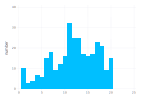

In [51]:
# 順に地域別平均値・個体数・地域色別平均値・分散
combine(groupby(dat, :Habitat), :number => mean)
combine(groupby(dat, [:Habitat, :morph_colour]), :number => sum)
combine(groupby(dat, [:Habitat, :morph_colour]), :number => mean)
combine(groupby(dat, [:Habitat, :morph_colour]), :number => var)

plot(dat, y = :number, Geom.bar)

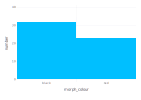

In [48]:
plot(dat, x = :morph_colour, y = :number, Geom.bar)

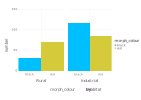

In [49]:
plot(dat, xgroup = :Habitat, x = :morph_colour, y = :number,
        color = :morph_colour,
        Scale.y_continuous(minvalue = 0),
        Geom.subplot_grid(Geom.bar()))

In [54]:
# 2-2分割表：Habitat -morph＿colour四通りの組み合わせに
cont = combine(groupby(dat, [:Habitat, :morph_colour]), :number => sum)

,Habitat,morph_colour,number_sum
,String,String,Int64
1,Rural,black,30
2,Rural,red,70
3,Industrial,black,115
4,Industrial,red,85


In [57]:
# reshapeで行列の型に
res = ChisqTest(reshape(cont[:, :number_sum], 2, 2))

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.161111, 0.172222, 0.322222, 0.344444]
    point estimate:          [0.1, 0.233333, 0.383333, 0.283333]
    95% confidence interval: [(0.04, 0.1604), (0.1733, 0.2937), (0.3233, 0.4437), (0.2233, 0.3437)]

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-5

Details:
    Sample size:        300
    statistic:          20.189098998887673
    degrees of freedom: 1
    residuals:          [-2.63705, 2.55056, 1.86467, -1.80352]
    std. residuals:     [-4.49323, 4.49323, 4.49323, -4.49323]


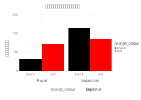

In [58]:
plot(dat, xgroup = :Habitat,
        x = :morph_colour, y = :number, color = :morph_colour,
        Scale.color_discrete_manual("black", "red"),
        Scale.y_continuous(minvalue = 0),
        Guide.ylabel("観測された個体数"),
        Guide.title("住むところ別の各色のてんとう虫の数"),
        Geom.subplot_grid(Geom.bar()))

In [59]:
pvalue(res)

7.01515649654485e-6

## t検定
2郡の比較。t検定で各郡のそれぞれの平均値の間には有意な差があるかどうか判断する。  
データセットは`compensation.csv`

In [67]:
dat = CSV.read("./datasets/compensation.csv", DataFrame)

dat

,Root,Fruit,Grazing
,Float64,Float64,String
1,6.225,59.77,Ungrazed
2,6.487,60.98,Ungrazed
3,4.919,14.73,Ungrazed
4,5.13,19.28,Ungrazed
5,5.417,34.25,Ungrazed
6,5.359,35.53,Ungrazed
7,7.614,87.73,Ungrazed
8,6.352,63.21,Ungrazed
9,4.975,24.25,Ungrazed


In [68]:
describe(dat)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Root,7.18115,4.426,7.1235,10.253,0,Float64
2,Fruit,59.4105,14.73,60.875,116.05,0,Float64
3,Grazing,,Grazed,,Ungrazed,0,String


In [72]:
draw(PDF("fig/coompensation_1.pdf", 10cm, 8cm),
        hstack(plot(dat, layer(x = "Grazing", y = "Fruit", Geom.point),
                layer(x = "Grazing", y = "Fruit", Geom.boxplot,
                    Theme(default_color=colorant"red"))),
            plot(dat, layer(x = "Grazing", y = "Root", Geom.point),
                layer(x = "Grazing", y = "Root", Geom.boxplot,
                    Theme(default_color=colorant"red"))))
        )

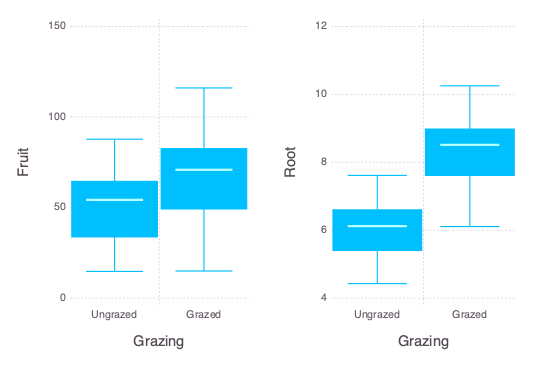

In [78]:
hstack(plot(dat, x = :Grazing, y = :Fruit, Geom.boxplot),
    plot(dat, x = :Grazing, y = :Root, Geom.boxplot))

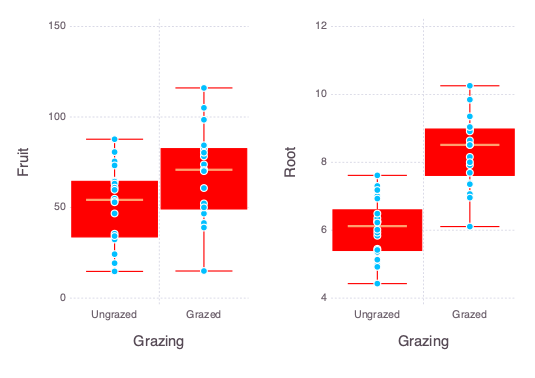

In [73]:
hstack(
    plot(
        dat,
        layer(x = "Grazing", y = "Fruit", Geom.point),
        layer(x = "Grazing", y = "Fruit", Geom.boxplot,
            Theme(default_color=colorant"red")
            )
        ),
    plot(
        dat,
        layer(x = "Grazing", y = "Root", Geom.point),
        layer(x = "Grazing", y = "Root", Geom.boxplot,
            Theme(default_color=colorant"red")
            )
        )
)

In [80]:
# t検定のためにGrazingの値によってdatを二つに分ける
datG = @linq dat |> where(:Grazing .== "Grased") |> select(:Root, :Fruit, :Grazing)
datU = @linq dat |> where(:Grazing .== "Ungrazed") |> select(:Root, :Fruit, :Grazing)
describe(datG)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Nothing,Nothing,Nothing,Int64,DataType
1,Root,NaN,,,,0,Float64
2,Fruit,NaN,,,,0,Float64
3,Grazing,,,,,0,String


In [81]:
describe(datU)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Root,6.0529,4.426,6.119,7.614,0,Float64
2,Fruit,50.8805,14.73,54.235,87.73,0,Float64
3,Grazing,,Ungrazed,,Ungrazed,0,String


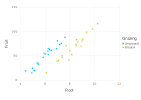

In [82]:
plot(dat, x="Root", y="Fruit", color="Grazing", Geom.point)

In [83]:
combine(groupby(dat, :Grazing), :Root => mean, :Root => var, :Fruit => mean, :Fruit => var)

,Grazing,Root_mean,Root_var,Fruit_mean,Fruit_var
,String,Float64,Float64,Float64,Float64
1,Ungrazed,6.0529,0.767725,50.8805,473.453
2,Grazed,8.3094,1.04795,67.9405,623.042


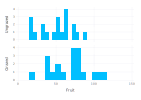

In [84]:
plot(dat, ygroup=:Grazing, x=:Fruit, Geom.subplot_grid(Geom.histogram(bincount=15)))

In [85]:
EqualVarianceTTest(datG[:, :Fruit], datU[:, :Fruit])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          NaN
    95% confidence interval: (NaN, NaN)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           NaN

Details:
    number of observations:   [0,20]
    t-statistic:              NaN
    degrees of freedom:       18
    empirical standard error: NaN


In [87]:
UnequalVarianceTTest(datG[:, :Fruit], datU[:, :Fruit])

ArgumentError: ArgumentError: TDist: the condition ν > zero(ν) is not satisfied.

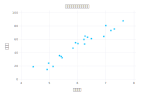

In [88]:
plot(layer(datG, x="Root", y="Fruit", Geom.point, Theme(default_color=colorant"red")),
    layer(datU, x="Root", y="Fruit", Geom.point),
    Guide.title("りんごの幹の太さと収穫量"),
    Guide.xlabel("台木直径"),
    Guide.ylabel("収穫量"))